---------------------------------------

# $SPA$tial $G$rap$H$s: n$ET$works, $T$opology, & $I$nference

## Tutorial for `pysal.spaghetti`: Working with point patterns: empirical observations


#### updated 04/2017; James D. Gaboardi [<jgaboardi@fsu.edu>]

1. Instantiating a `pysal.spaghetti.Network`
2. Allocating observations to a network
    * snapping
3. Visualizing original and snapped locations
    * visualization with `networkx`

In [1]:
import sys
sys.path.append('..')
#import pysal.spaghetti as pssp
from spaghetti import network as psspnet
import libpysal as lbps
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from collections import OrderedDict

% matplotlib inline

# 1. Instantiating a `pysal.spaghetti.Network`
### Instantiate the network from `.shp` file

In [2]:
ntw = psspnet.Network(lbps.examples.get_path('streets.shp'))

# 2. Allocating observations to a network
### Snap point patterns to the network

In [6]:
# Crimes with attributes
ntw.snapobservations(lbps.examples.get_path('crimes.shp'), 'crimes', attribute=True)
# Schools without attributes
ntw.snapobservations(lbps.examples.get_path('schools.shp'), 'schools', attribute=False)

### A network is composed of a single topological representation of a road and $n$ point patterns which are snapped to the network.

In [7]:
ntw.pointpatterns

{'crimes': <spaghetti.network.PointPattern instance at 0x11de17950>,
 'schools': <spaghetti.network.PointPattern instance at 0x11de172d8>}

In [8]:
dir(ntw.pointpatterns['crimes'])

['__doc__',
 '__init__',
 '__module__',
 'dist_to_node',
 'npoints',
 'obs_to_edge',
 'obs_to_node',
 'points',
 'snapped_coordinates']

### Attributes for every point pattern

1. `dist_to_node` dict keyed by pointID with the value being a dict in the form 
        {node: distance to node, node: distance to node}
2. `obs_to_edge` dict keyed by edgeID (tuple) with the value being a dict in the form 
        {pointID:(x-coord, y-coord), pointID:(x-coord, y-coord), ... }
3. `obs_to_node` dict keyed by nodeID with the value being a list of pointIDs
        {nodeID:[pointID]}
4. `points` geojson like representation of the point pattern.  Includes properties if read with attributes=True.
        {pointID: {'coordinates': (x-coord, y-coord), 'properties': [[attributes, attributes,...]]}
5. `snapped_coordinates` dict keyed by pointID with the value being (x-coord, y-coord)
        {pointID: (x-coord, y-coord)}

# 3. Visualizing original and snapped locations

## School locations

In [28]:
school_points = ntw.pointpatterns['schools'].points
print type(school_points)
print school_points.items()[0]

<type 'dict'>
(0, {'properties': None, 'coordinates': (727082.0462136, 879863.260705768)})


### **  The original coordinates of the schools need to be extracted from `school_points`

In [29]:
schools = range(len(school_points))
school_coords = {school:school_points[school]["coordinates"] for school in schools}
print type(school_coords)
print school_coords.items()[0]

<type 'dict'>
(0, (727082.0462136, 879863.260705768))


## Snapped school locations

In [30]:
snapped_school_coords = ntw.pointpatterns['schools'].snapped_coordinates
print type(snapped_school_coords)
print snapped_school_coords.items()[0]

<type 'dict'>
(0, (727287.6644417326, 879867.3863186113))


## Crime locations

In [ ]:
crime_points = ntw.pointpatterns['crimes'].points
print type(crime_points)
print crime_points.items()[0]

### **  The original coordinates of the schools need to be extracted from `school_points`

In [ ]:
crimes = range(len(crime_points))
crime_coords = {crime:crime_points[crime]["coordinates"] for crime in crimes}
print type(crime_coords)
print crime_coords.items()[0]

## Snapped school locations

In [10]:
snapped_crime_coords = ntw.pointpatterns['crimes'].snapped_coordinates
print type(snapped_crime_coords)
print snapped_crime_coords.items()[0]

## Plotting with `networkx`

### ** This is 5 `networkx.Graph` objects plotted together

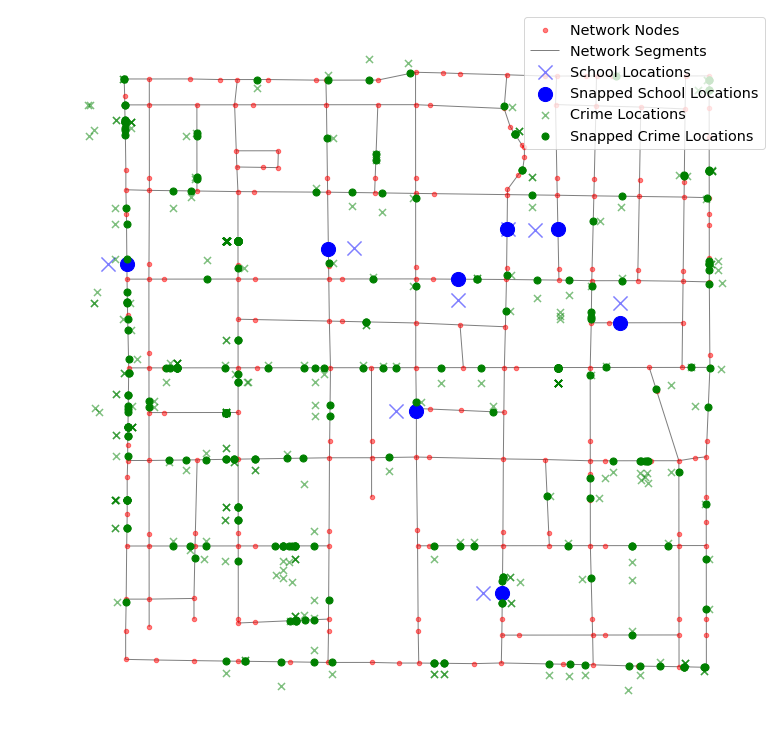

In [32]:
mpl.rcParams['figure.figsize'] = 10, 10

# Graph edges & nodes
g1 = nx.Graph()
for e in ntw.edges:
    g1.add_edge(*e)
for n, p in ntw.node_coords.iteritems():
    g1.node[n] = p
nx.draw(g1, ntw.node_coords, node_size=20, alpha=0.5)

# School locations
g2 = nx.Graph()
for n, p in school_coords.iteritems():
    g2.node[n] = p       
nx.draw(g2, school_coords, node_size=200, node_shape='x', alpha=.5, node_color='blue')

# School locations snapped to the network
g3 = nx.Graph()
for n, p in snapped_school_coords.iteritems():
    g3.node[n] = p    
nx.draw(g3, snapped_school_coords, node_size=200, alpha=1.0, node_color='blue')

# Crime locations
g4 = nx.Graph()
for n, p in crime_coords.iteritems():
    g4.node[n] = p       
nx.draw(g4, crime_coords, node_size=50, node_shape='x', alpha=.5, node_color='green')

# Crime locations snapped to the network
g5 = nx.Graph()
for n, p in snapped_crime_coords.iteritems():
    g5.node[n] = p    
nx.draw(g5, snapped_crime_coords, node_size=50, alpha=1.0, node_color='green')

leg = OrderedDict()
leg['Network Nodes']=g1
leg['Network Segments']=g1
leg['School Locations']=g2
leg['Snapped School Locations']=g3
leg['Crime Locations']=g4
leg['Snapped Crime Locations']=g5
plt.legend(leg, loc='best', fancybox=True, framealpha=0.8, scatterpoints=1, fontsize="x-large")

-----------